### 1.1
What is the value of $\sqrt{2}^{\sqrt{2}^{{\sqrt{2}^{...}}}}$?

In [8]:
import math
exponent = 1
for n in range(0,1000):
    exponent = math.sqrt(2)**exponent
print exponent


2.0


### 3.1
You have a bag with two coins. One will come up heads 40% of the time, and the other will come up heads 60%. You pick a coin randomly, flip it and get a head. What is the probability it will be heads on the next flip?

In [1]:
import random as rnd

firstFlipIsAHeadCounter = 0
secondFlipIsAHeadCounter = 0

def headsOrTails(probTails):
    if rnd.random() < probTails:
        return 0 # tails!
    return 1 # heads!


for trialCtr in range(1,100000):
    if rnd.random() < 0.5: #reach into bag, and grab either coin
        probTails = 0.6 #heads 40% of the time
    else:
        probTails = 0.4 #heads 60% of the time
    coin = headsOrTails(probTails) #flip the coin!
    
    if coin == 1: # it's a head 
        firstFlipIsAHeadCounter +=1
        secondFlipIsAHeadCounter += headsOrTails(probTails)

probEstimate = float(secondFlipIsAHeadCounter) / firstFlipIsAHeadCounter
print(secondFlipIsAHeadCounter, firstFlipIsAHeadCounter)
print(probEstimate)

26060 49890
0.5223491681699739


### 3.1 Object-oriented version

Here we solve the same problem, but introducing objects to python.

A simplistic approach to OO design is to identify the nouns in the problem description, and consider those to be potential *classes*. A class is a template, sort of like a cookies cutter for stamping out identical objects, ready for use.

In this problem, we see **coin** and **purse** in the problem description. So let's make them into classes.

The *method* of a class represent the actions we expect of the objects created from the class.

In [2]:
import numpy as np

class Coin(object):
    def __init__(self, p):
        self.prob_heads = p
        
    def flip_is_head(self):
        return np.random.random() < self.prob_heads
    
    def __repr__(self):
        return 'Coin with p = ' + str(self.prob_heads)
    
class Bag_of_coins(object):
    def __init__(self):
        self.coins = []

    def add_coin(self, coin):
        self.coins.append(coin)

    def pick_random_coin(self):
        return np.random.choice(self.coins)
    
bag = Bag_of_coins()
bag.add_coin(Coin(0.4))
bag.add_coin(Coin(0.6))

num_trials = 100000
trial_ctr = 0
head_ctr = 0
while trial_ctr < num_trials:
    coin = bag.pick_random_coin()
    if coin.flip_is_head():
        trial_ctr += 1
        if coin.flip_is_head():
            head_ctr += 1
head_ctr / trial_ctr
     

0.51961

### 3.3
In front of you is a jar of 1000 coins. One of the coins has two heads, and the rest are fair coins. You choose a coin at random, and flip it ten times, getting all heads. What is the probability it is one of the fair coins?

In [7]:
cb = Bag_of_coins()
cb.add_coin(Coin(1))
[cb.add_coin(Coin(0.5)) for n in range(0,999)]

useabletrialCtr = 0
fairCoinCtr = 0 

for i in range(100000):
    randomCoin = cb.pick_random_coin()
    head_counter = 0
    for _ in range(10):
        if randomCoin.flip_is_head():
            head_counter += 1
        
    if head_counter == 10:
        useabletrialCtr += 1
        if randomCoin.prob_heads < 1:
            fairCoinCtr += 1
print(fairCoinCtr, useabletrialCtr, float(fairCoinCtr)/useabletrialCtr)

109 206 0.529126213592233


### Monte Hall Problem

you are a contestant on a game show. You have 3 doors in front of you. Behind two of the doors are goats. Unattractive goats. Behind the other door is a brand new Tesla. The game show host asks you to choose a door. After you do, he opens one of the remaining doors, and there stands a goat. The game show host asks you if you'd like to switch doors. What do you do?

### 3.5
Starting at one vertex of a cube, and moving randomly from vertex to adjacent vertices, what is the expected number of moves until you reach the  vertex opposite from your starting point?

### 3.8
You have a spinner that generates random numbers that are uniform between 0 and 1. You sum the spins until the sum is greater than one. What is the expected number of spins?

In [66]:
import numpy as np
class spinner(object):
    def __init__(self):
        self.total = 0
        self.spinCounter = 0
        
    def spin(self):
        self.total += np.random.random()
        self.spinCounter += 1
        
    def reset(self):
        self.total = 0
        self.spinCounter = 0
        
    def spinUntilGreaterThanOneAndReset(self):
        while self.total < 1:
            self.spin()
        answer = self.spinCounter
        self.reset()    
        return answer
    
spinner = spinner()
totalSpins = 0
numTrials = 1000
trials = [spinner.spinUntilGreaterThanOneAndReset() for n in range(numTrials)]
#print trials
#print float(totalSpins) / numTrials

Populating the interactive namespace from numpy and matplotlib


(array([ 0.52 ,  0.326,  0.119,  0.03 ,  0.005]),
 array([ 2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 5 Patch objects>)

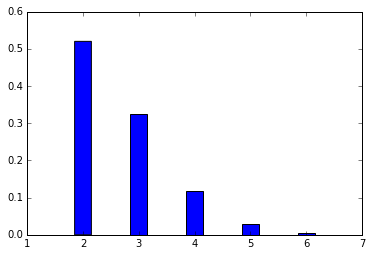

In [67]:
#need next line to get figure to appear in Jupyter
%pylab inline 
import matplotlib.pyplot as plt

numBins = np.max(trials) - np.min(trials) + 1
plt.hist(trials, bins=numBins, normed=True, align='left', rwidth=0.3, range=(2, 2 + numBins))

### 3.10
A stick is broken randomly into 3 pieces. What is the probability of the pieces being able to form a triangle?

### 3.11
A stick is broken randomly into two pieces. The larger piece is then broken randomly into two pieces. What is the probability of the pieces being able to form a triangle?

### 3.12
This is based on a Goldman Sachs interview question. You play a game where you toss two fair coins in the air. You always win $1. However, if you have tossed 2 heads at least once, and 2 tails at least once, you surrender all winnings, and cannot play again. You may stop playing at anytime. What’s your strategy?

In [ ]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

class TwoDiceGame(object):
    def play(self):
        winnings = 0
        two_of_same_seen = False
        while True:
            if two_of_same_seen:
                if winnings >= 3:
                    # our strategy: quit if we have 3+ in this case 
                    return winnings
                if np.random.randint(4) == 0:
                    # bad luck: both HH and TT seen, lost it all
                    return 0
            else:
                two_of_same_seen = np.random.randint(2) == 0
            winnings += 1
    
game = TwoDiceGame()
num_trials = 10000
trials = [game.play() for _ in range(num_trials)]
num_bins = np.max(trials) - np.min(trials) + 1
plt.hist(trials, bins = num_bins, normed = True, 
         align = 'left', rwidth=0.3, range = (0, num_bins))

np.mean(trials)

### 5.2
You have a basket of $n$ assets. The asset returns are multivariate normal with zero mean. Correlation between any pair of assets is 1/2. What is the probability that $k$ of the assets will have positive return?

In [130]:
from scipy.stats import mvn
from scipy.special import comb
import numpy as np

n = 10
k = 4

# Sigma1 = (1/2) * np.ones((n, n))
# np.fill_diagonal(Sigma1, 1)
Sigma1 = np.identity(n)
mu = np.zeros((n,))

low = np.concatenate((np.zeros(k), -np.inf * np.ones(n - k)))
upp = np.concatenate((np.inf * np.ones(k), np.zeros(n - k)))

p, i = mvn.mvnun(lower=low, upper=upp, means=mu, covar=Sigma1)

# Probability k are positive
comb(n, k) * p

0.0009765625

**Check that probabilities sum up to 1**

In [126]:
n = 10

prob = 0
for k in range(0, n + 1):
    Sigma1 = (1/2) * np.ones((n, n))
    np.fill_diagonal(Sigma1, 1)
    # Sigma1 = np.identity(k)
    mu = np.zeros((n,))

    low = np.concatenate((np.zeros(k), -np.inf * np.ones(n - k)))
    upp = np.concatenate((np.inf * np.ones(k), np.zeros(n - k)))

    p, i = mvn.mvnun(lower=low, upper=upp, means=mu, covar=Sigma1)

    # Probability k are positive
    prob = prob + comb(n, k) * p

prob

1.0

### 5.10
Suppose there are 36 students in the QFRM program, each assigned a unique integer from 1 to 36. Thirty-six quarters are laid out on a table in a row, heads up. Each student goes to the table, and if they are assigned the number $n$, they turn over the $n$th coin, the $2n$th coin, and so on. So, for example, the student who is assigned 15 will turn over the 15th and 30th coins. When everyone is done, how many tails are showing?